# Extremme Gradient Boosting

## 1. Prepare the data

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor, XGBClassifier, plot_importance, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, f1_score, confusion_matrix, classification_report

In [52]:
df_football = pd.read_pickle('data/df_data_cleaned.csv')
df_football.columns = df_football.columns.str.replace(" ", "_")

In [55]:
train, test = train_test_split(df_football, train_size=0.75, test_size=0.25)
X_train = train.drop(columns=['Name', 'Club', 'Position', 'Preferred_Foot', 'Value', 'Wage'])
y_train = train[['Value']]
X_test = test.drop(columns=['Name', 'Club', 'Position', 'Preferred_Foot', 'Value', 'Wage'])
y_test = test[['Value']]

In [56]:
X_train = X_train.astype(float)
y_train = y_train.astype(float)
X_test = X_test.astype(float)
y_test = y_test.astype(float)

In [85]:
XGBRegressor?

# Extremme Gradient Boosting
Is one of the librarys more used to win the Kaggles competitions. It's an Ensemble Learning method that uses a number of trees to fit the model, this method have an loss function that have to minimize in order to get better results, (that's why is called Boosting). Now we are going to explain the hyperparameters that we haven't seen before in other trees methods
### Hypeparameters
* learning_rate: each weight in all the trees will be multiplied by this value. if you have lower learning rate probably your model will improve, but the training phase will be slower
* gamma: a node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.
* subsample: the fraction of observations to be randomly samples for each tree
* colsample_bytree: the fraction of columns to be randomly samples for each tree.
* colsample_bylevel: the subsample ratio of columns for each split
* min_child_weight: to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
* reg_alpha: it's a regularization to control the loss function, it's L1 regularization that make some weights 0
* reg_lambda: it's a regularization to control the loss function, it's like L2 Regularization, that encourage the weights to be small
* scale_pos_weights: in cas o high class imbalance it will hlp to converge faster

In [57]:
xgb_reg = XGBRegressor(random_state=2019, n_jobs=-1)

xgb_reg.fit(X_train, y_train)
predictions = xgb_reg.predict(X_test)
print('MAE in train:', mean_absolute_error(xgb_reg.predict(X_train), y_train))
print('MSE in train:', np.sqrt(mean_squared_error(xgb_reg.predict(X_train), y_train)))
print('MAE in test:', mean_absolute_error(xgb_reg.predict(X_test), y_test))
print('RMSE in test:', np.sqrt(mean_squared_error(xgb_reg.predict(X_test), y_test)))

[17:20:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE in train: 5746110.379221113
MSE in train: 11940932.079738041
MAE in test: 5762832.3067050055
RMSE in test: 12092453.3696438


In [58]:
xgb_reg2 = XGBRegressor(n_estimators=400, 
                        random_state=2019, n_jobs=-1) #set n_jobs in -2 if your computer is not powerfull

xgb_reg2.fit(X_train, y_train)
predictions = xgb_reg2.predict(X_test)
print('MAE in train:', mean_absolute_error(xgb_reg2.predict(X_train), y_train))
print('MSE in train:', np.sqrt(mean_squared_error(xgb_reg2.predict(X_train), y_train)))
print('MAE in test:', mean_absolute_error(xgb_reg2.predict(X_test), y_test))
print('RMSE in test:', np.sqrt(mean_squared_error(xgb_reg2.predict(X_test), y_test)))

[17:20:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE in train: 4747261.037140243
MSE in train: 9909077.615865568
MAE in test: 5254612.6980991205
RMSE in test: 11210756.674112333


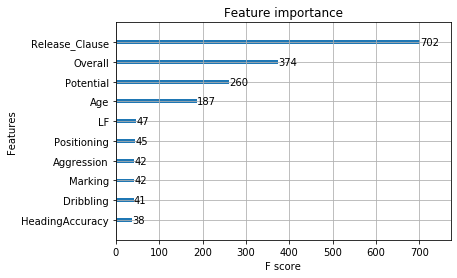

In [59]:
plot_importance(xgb_reg2, max_num_features=10, importance_type='weight')

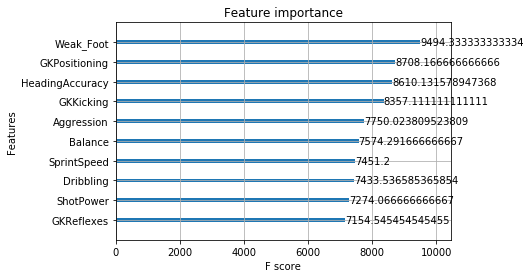

In [60]:
plot_importance(xgb_reg2, max_num_features=10, importance_type='cover')

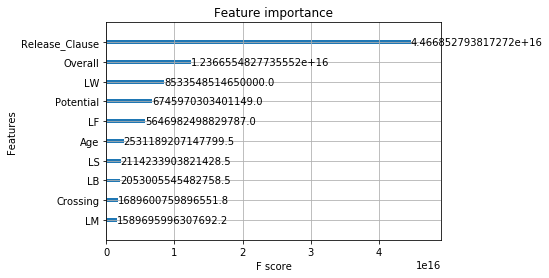

In [61]:
plot_importance(xgb_reg2, max_num_features=10, importance_type='gain')

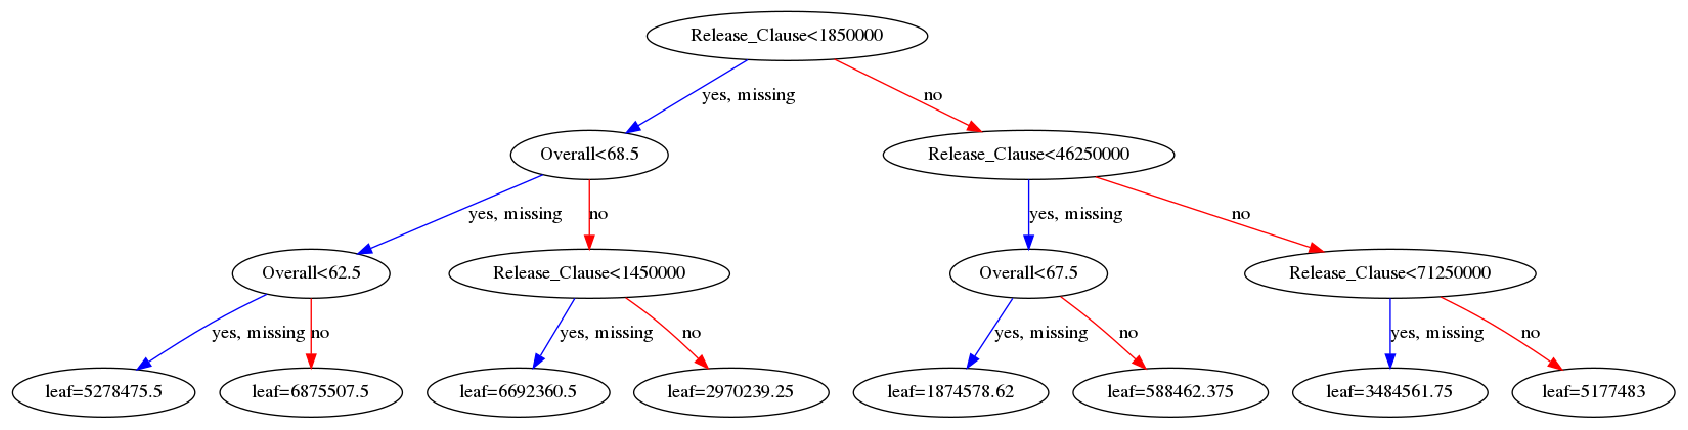

In [83]:
ax = plot_tree(xgb_reg2)
fig = ax.figure
fig.set_size_inches(30, 22)
pass
plt.savefig('xgb_reg.png')